# Technical Requirements

versions used in this chapter
```

Matplotlib -> 3.5.1
pandas -> 1.4.1   
numpy -> 1.22.2
scipy -> 1.8.0
statsmodels -> 0.13.2
```

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.tools import diff
from pathlib import Path
import warnings

warnings.filterwarnings('ignore')
plt.rc("figure", figsize=(16, 5))

In [4]:
###### configurations for image quality#######
plt.rcParams["figure.figsize"] = [12, 5]   ##
# plt.rcParams['figure.dpi'] = 300           ## 300 for printing
plt.rc('font', size=8)                     ## 
plt.rc('axes', titlesize=16)               ## 
plt.rc('axes', labelsize=14)               ##
plt.rc('xtick', labelsize=10)              ##
plt.rc('ytick', labelsize=10)              ##
plt.rc('legend', fontsize=10)              ##
plt.rc('figure', titlesize=12)             ## 
#############################################

# Forecasting Time Series Data using Auto_ARIMA

In [5]:
import pmdarima as pm

In [6]:
milk_file = Path('../../datasets/Ch11/milk_production.csv')

milk = pd.read_csv(milk_file, 
                   index_col='month', 
                   parse_dates=True)

In [7]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(milk, test_size=0.10, shuffle=False)
# same results using pmdarima
train, test = pm.model_selection.train_test_split(milk, test_size=0.10)

In [8]:
print(f'Train: {train.shape}')
print(f'Test: {test.shape}')

Train: (151, 1)
Test: (17, 1)


## How to do it

In [9]:
auto_model = pm.auto_arima(train, 
                           seasonal=True, 
                           m=12, 
                           test='adf',
                           stepwise=True)
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  151
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -475.008
Date:                            Tue, 26 Apr 2022   AIC                            956.016
Time:                                    21:40:17   BIC                            964.798
Sample:                                         0   HQIC                           959.585
                                            - 151                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2714      0.082     -3.326      0.001      -0.431      -0.111
ma.S.L12      -0.6233      0.079     -7.908      0.000      -0.778      -0.469
sigma2        54.7638      5.498      9.960      0.000      43.987      65.540
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                31.78
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               1.22   Skew:                             0.74
Prob(H) (two-sided):                  0.50   Kurtosis:                         4.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
auto_model = pm.auto_arima(train, 
                           seasonal=True, 
                           m=12, 
                           test='adf', 
                           stepwise=True,
                           trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=961.878, Time=0.58 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1005.341, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=971.814, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=956.016, Time=0.11 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=996.508, Time=0.04 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=957.982, Time=0.20 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=957.967, Time=0.39 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=971.938, Time=0.07 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=960.016, Time=0.45 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=964.474, Time=0.07 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=957.884, Time=0.15 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=957.783, Time=0.17 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=956.436, Time=0.12 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=959.701, Time=0.35 sec
 ARIMA(0,1,1)(0,1,1)[12] interce

In [11]:
auto_model = pm.auto_arima(train, 
                           seasonal=True, 
                           m=12, 
                           test='adf', 
                           information_criterion='bic',
                           stepwise=True,
                           trace=True)


Performing stepwise search to minimize bic
 ARIMA(2,1,2)(1,1,1)[12]             : BIC=982.369, Time=0.67 sec
 ARIMA(0,1,0)(0,1,0)[12]             : BIC=1008.269, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : BIC=980.596, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12]             : BIC=964.798, Time=0.12 sec
 ARIMA(0,1,1)(0,1,0)[12]             : BIC=1002.362, Time=0.05 sec
 ARIMA(0,1,1)(1,1,1)[12]             : BIC=969.691, Time=0.36 sec
 ARIMA(0,1,1)(0,1,2)[12]             : BIC=969.676, Time=0.37 sec
 ARIMA(0,1,1)(1,1,0)[12]             : BIC=980.720, Time=0.10 sec
 ARIMA(0,1,1)(1,1,2)[12]             : BIC=974.652, Time=0.48 sec
 ARIMA(0,1,0)(0,1,1)[12]             : BIC=970.329, Time=0.06 sec
 ARIMA(1,1,1)(0,1,1)[12]             : BIC=969.593, Time=0.16 sec
 ARIMA(0,1,2)(0,1,1)[12]             : BIC=969.493, Time=0.17 sec
 ARIMA(1,1,0)(0,1,1)[12]             : BIC=965.218, Time=0.12 sec
 ARIMA(1,1,2)(0,1,1)[12]             : BIC=974.337, Time=0.29 sec
 ARIMA(0,1,1)(0,1,1)[12] interc

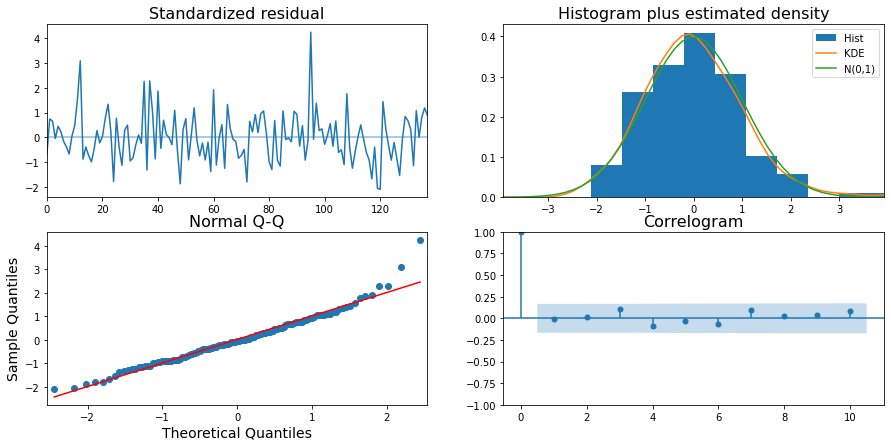

In [12]:
auto_model.plot_diagnostics(figsize=(15,7)); plt.show()

In [13]:
auto_model.scoring

'mse'

In [14]:
auto_model

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

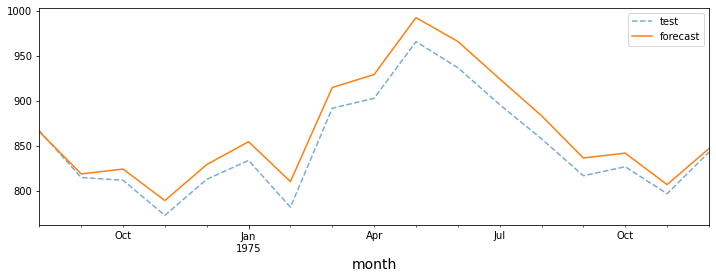

In [15]:
n = test.shape[0]
index = test.index
ax = test.plot(style='--', alpha=0.6, figsize=(12,4))
pd.Series(auto_model.predict(n_periods=n), 
          index=index).plot(style='-', ax=ax)
plt.legend(['test', 'forecast']); plt.show()

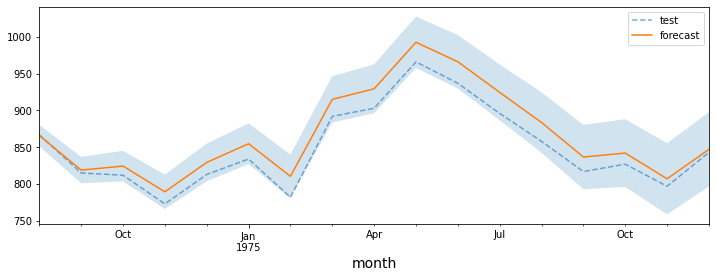

In [16]:
n = test.shape[0]
forecast, conf_interval = auto_model.predict(n_periods=n, return_conf_int=True)
lower_ci, upper_ci  = zip(*conf_interval)

index = test.index
ax = test.plot(style='--', alpha=0.6, figsize=(12,4))
pd.Series(forecast, index=index).plot(style='-', ax=ax)
plt.fill_between(index, lower_ci, upper_ci, alpha=0.2)
plt.legend(['test', 'forecast']); plt.show()

In [17]:
sum(forecast) == sum(conf_interval.mean(axis=1))

True

## There is more

In [18]:
from pmdarima.arima.utils import ndiffs, nsdiffs

# ADF test:
n_adf = ndiffs(milk, test='adf') 
# KPSS test (auto_arima default):
n_kpss = ndiffs(milk, test='kpss') 
# PP test:
n_pp = ndiffs(milk, test='pp')  

In [19]:
print(f'''
differencing (d) term using:
    ADF: {n_adf}
    KPSS: {n_kpss}
    PP: {n_pp}
''')


differencing (d) term using:
    ADF: 0
    KPSS: 1
    PP: 0



In [20]:
# OCSB test
max_D = nsdiffs(milk, test='ocsb', m=12, max_D=12) 

In [21]:
print(f'''
Seasonal differencing (D) term: {max_D}
''')


Seasonal differencing (D) term: 1



In [22]:
model = pm.auto_arima(train, 
                      seasonal=True,
                      with_intercept=True,
                      d=1,
                      max_d=2,
                      start_p=0, max_p=2,
                      start_q=0, max_q=2,
                      m=12,
                      D=1,
                      max_D=2,
                      start_P=0, max_P=2,
                      start_Q=0, max_Q=2,
                      information_criterion='aic',
                      stepwise=False,
                      out_of_sample_siz=25,
                      test = 'kpss',
                      score='mape',
                      trace=True)

 ARIMA(0,1,0)(0,1,0)[12] intercept   : AIC=1007.319, Time=0.02 sec
 ARIMA(0,1,0)(0,1,1)[12] intercept   : AIC=966.470, Time=0.14 sec
 ARIMA(0,1,0)(0,1,2)[12] intercept   : AIC=968.422, Time=0.30 sec
 ARIMA(0,1,0)(1,1,0)[12] intercept   : AIC=983.036, Time=0.11 sec
 ARIMA(0,1,0)(1,1,1)[12] intercept   : AIC=968.438, Time=0.16 sec
 ARIMA(0,1,0)(1,1,2)[12] intercept   : AIC=970.470, Time=0.43 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=973.451, Time=0.36 sec
 ARIMA(0,1,0)(2,1,1)[12] intercept   : AIC=968.640, Time=0.48 sec
 ARIMA(0,1,0)(2,1,2)[12] intercept   : AIC=inf, Time=1.53 sec
 ARIMA(0,1,1)(0,1,0)[12] intercept   : AIC=998.468, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=958.000, Time=0.14 sec
 ARIMA(0,1,1)(0,1,2)[12] intercept   : AIC=959.947, Time=0.41 sec
 ARIMA(0,1,1)(1,1,0)[12] intercept   : AIC=973.934, Time=0.12 sec
 ARIMA(0,1,1)(1,1,1)[12] intercept   : AIC=959.963, Time=0.22 sec
 ARIMA(0,1,1)(1,1,2)[12] intercept   : AIC=962.000, Time=0.49 sec
 ARIMA(0,1,1)

In [23]:
model.out_of_sample_size

0

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  151
Model:             SARIMAX(2, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -472.969
Date:                            Tue, 26 Apr 2022   AIC                            957.937
Time:                                    21:40:58   BIC                            975.501
Sample:                                         0   HQIC                           965.075
                                            - 151                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0460      0.621     -0.074      0.941      -1.263       1.171
ar.L1         -1.1997      0.092    -13.044      0.000      -1.380      -1.019
ar.L2         -0.3072      0.098     -3.137      0.002      -0.499      -0.115
ma.L1          0.9585      0.066     14.616      0.000       0.830       1.087
ma.S.L12      -0.6124      0.084     -7.289      0.000      -0.777      -0.448
sigma2        52.8038      5.479      9.637      0.000      42.065      63.543
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                41.88
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.28   Skew:                             0.82
Prob(H) (two-sided):                  0.41   Kurtosis:                         5.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

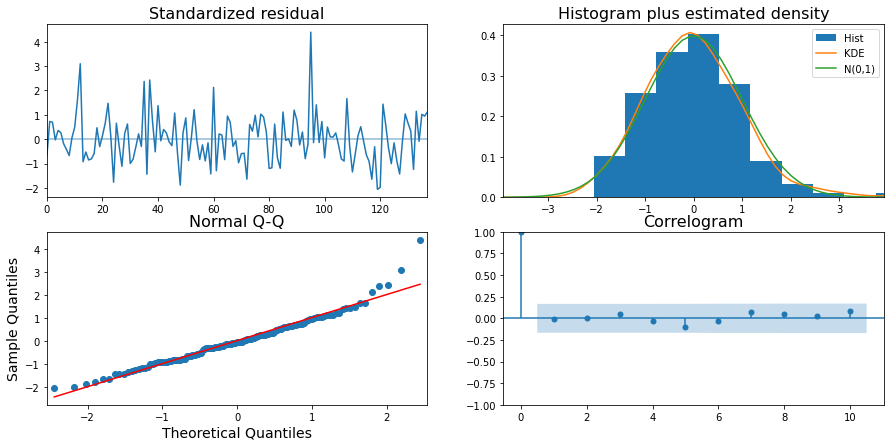

In [25]:
model.plot_diagnostics(figsize=(15,7));plt.show()

# Forecasting Time Series Data using Prophet

In [1]:
from prophet import Prophet

milk_file = Path('../../datasets/Ch11/milk_production.csv')
milk = pd.read_csv(milk_file, parse_dates=['month'], )
milk.columns = ['ds', 'y']

/Users/tarekatwan/opt/anaconda3/envs/ts/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
milk.head()

,ds,y
0,1962-01-01,589
1,1962-02-01,561
2,1962-03-01,640
3,1962-04-01,656
4,1962-05-01,727


In [4]:
idx = round(len(milk) * 0.90)
train = milk[:idx]
test = milk[idx:]
print(f'Train: {train.shape}')
print(f'Test: {test.shape}')

Train: (151, 2)
Test: (17, 2)


In [5]:
milk.tail()

,ds,y
163,1975-08-01,858
164,1975-09-01,817
165,1975-10-01,827
166,1975-11-01,797
167,1975-12-01,843


<AxesSubplot:title={'center':'Monthly Milk Production'}, xlabel='ds'>

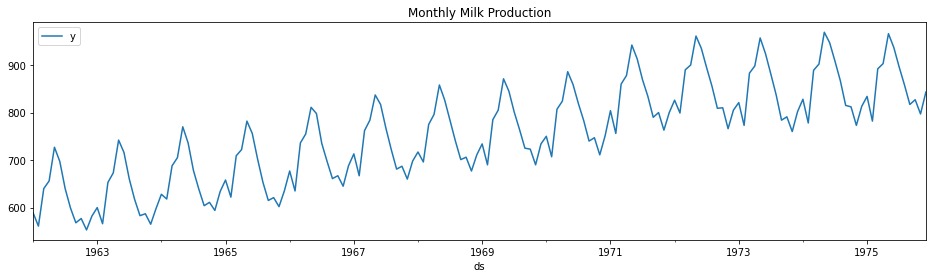

In [6]:
milk.set_index('ds').plot(title='Monthly Milk Production')

In [136]:
model = Prophet().fit(train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.30844
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       627.146    0.00871858       1129.66           1           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       634.492   0.000501091       335.791      0.2918      0.9652      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     220       634.894   2.98312e-05       124.573   1.907e-07       0.001      298  LS failed, Hessian reset 
     262       635.636   3.09362e-05       107.777   1.504e-07       0.001      379  LS failed, Hessian reset 
     299       636.054   0.000495742        226.47      0.9986      0.9986      430   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       637.354   4.85415e-05       80.6149       0.887       0.887      552   
    Iter      log pro

In [137]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [2]:
model.component_modes

In [139]:
future = model.make_future_dataframe(len(test), freq='MS')

In [140]:
len(milk) == len(future)

True

In [141]:
future.shape

(168, 1)

In [142]:
forecast = model.predict(future)

In [143]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [144]:
cols = ['ds', 'yhat', 'yhat_lower', 'yhat_upper']

In [145]:
milk.head()

,ds,y
0,1962-01-01,589
1,1962-02-01,561
2,1962-03-01,640
3,1962-04-01,656
4,1962-05-01,727


In [146]:
forecast[cols].head()

,ds,yhat,yhat_lower,yhat_upper
0,1962-01-01,586.919724,577.962460,596.210537
1,1962-02-01,547.514922,538.798935,556.023023
2,1962-03-01,641.526021,631.866573,650.302804
3,1962-04-01,659.337175,650.120268,668.109313
4,1962-05-01,722.409613,713.683673,731.650410


In [147]:
pd.concat([forecast['yhat'].iloc[0:5], train['y'].iloc[0:5]], axis=1)

,yhat,y
0,586.919724,589
1,547.514922,561
2,641.526021,640
3,659.337175,656
4,722.409613,727


In [148]:
pd.concat([forecast['yhat'].iloc[-5:], test['y'].iloc[-5:]], axis=1)

,yhat,y
163,841.554326,858
164,800.475070,817
165,804.708956,827
166,773.614666,797
167,806.863284,843


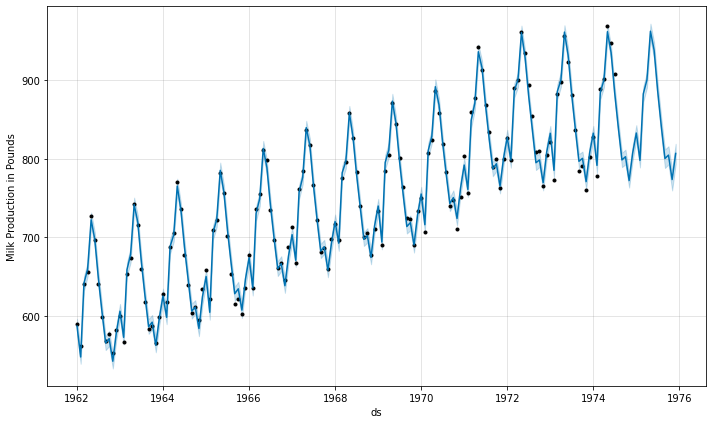

In [149]:
model.plot(forecast, ylabel='Milk Production in Pounds')
plt.show()

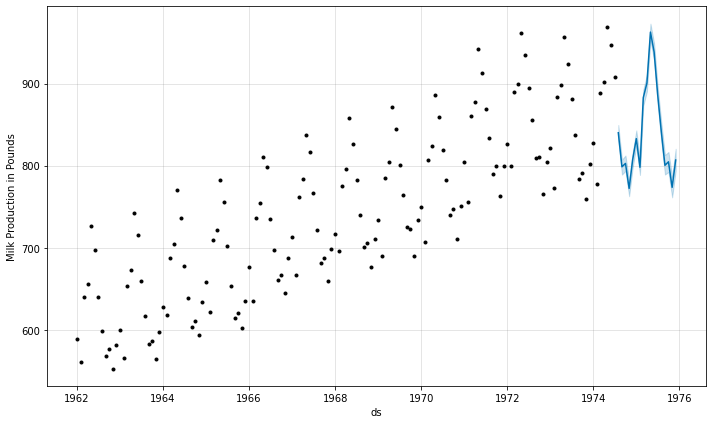

In [150]:
predicted = model.predict(test)
model.plot(predicted, ylabel='Milk Production in Pounds')
plt.show()

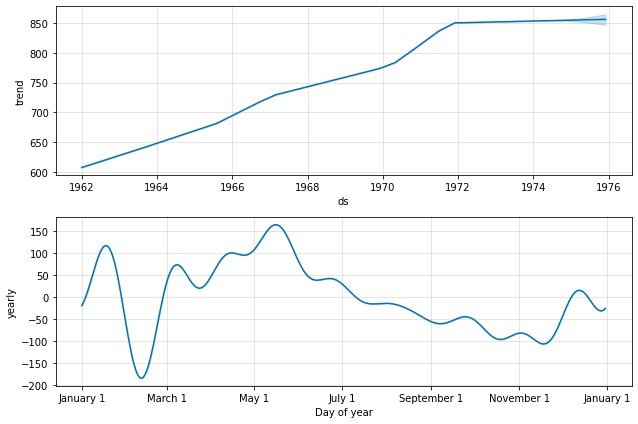

In [151]:
model.plot_components(forecast)
plt.show()

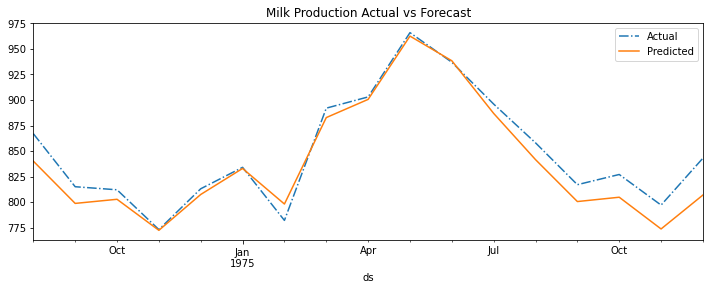

In [152]:
ax = test.plot(x='ds', y='y', 
                    label='Actual', 
                    style='-.', 
                    figsize=(12,4))
predicted.plot(x='ds', y='yhat', 
               label='Predicted', 
               ax=ax)
plt.title('Milk Production Actual vs Forecast')
plt.show()

### How it works


In [153]:
model.changepoints.shape

(25,)

In [160]:
model.changepoints.head()

5    1962-06-01
10   1962-11-01
14   1963-03-01
19   1963-08-01
24   1964-01-01
Name: ds, dtype: datetime64[ns]

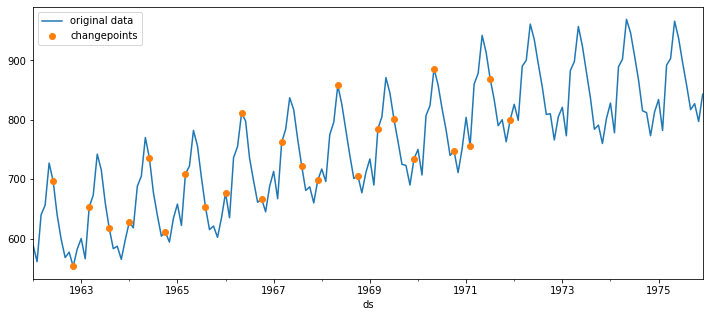

In [161]:
ax = milk.set_index('ds').plot(figsize=(12,5))
milk.set_index('ds').loc[model.changepoints].plot(style='o', ax=ax)
plt.legend(['original data', 'changepoints'])
plt.show()

### There is more

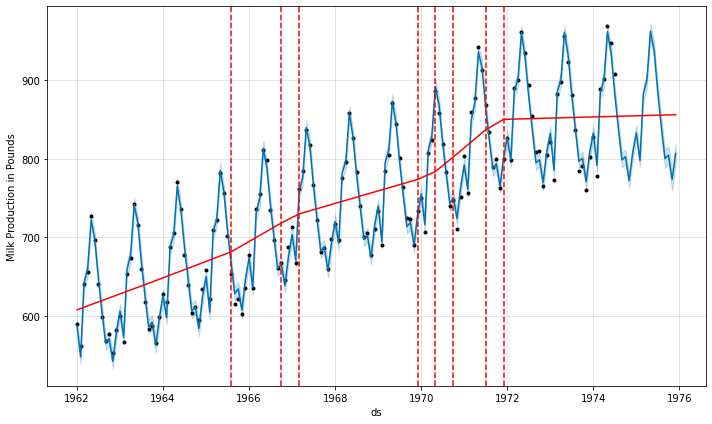

In [162]:
from prophet.plot import add_changepoints_to_plot

fig = model.plot(forecast, ylabel='Milk Production in Pounds')
add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()

**Logistic Growth**

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -4.14197
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       446.477    0.00258608       106.585      0.5101      0.5101      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     120       447.014   0.000506969         51.05   7.165e-06       0.001      196  LS failed, Hessian reset 
     156        447.04   0.000104071       60.6896     1.4e-06       0.001      286  LS failed, Hessian reset 
     199       447.046    9.1512e-06       77.8886      0.5712      0.5712      344   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     207       447.058   0.000162733       76.6966   2.529e-06       0.001      414  LS failed, Hessian reset 
     254       447.067   8.83354e-09        75.146     0.06696           1      488   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was 

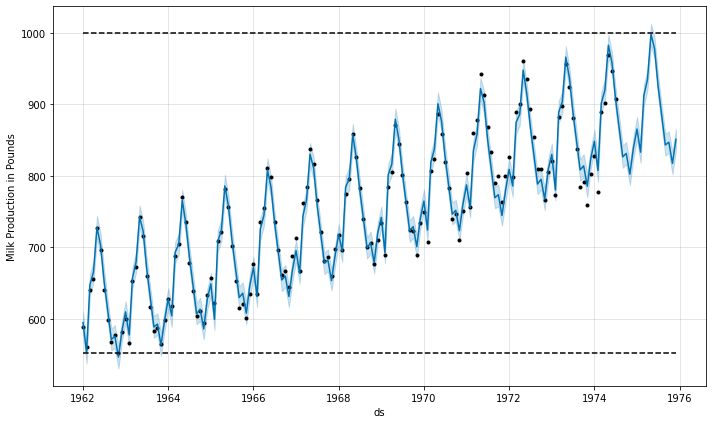

In [164]:
train['cap'] = 1000
train['floor']=train['y'].min()
model = (
        Prophet(growth='logistic')
         .fit(train)
        )

future = model.make_future_dataframe(len(test), freq='MS')
future['cap']=1000
future['floor']=train['y'].min()
forecast = model.predict(future)
model.plot(forecast, ylabel='Milk Production in Pounds')
add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()

# Forecasting Multivariate Time Series Data using VAR

**VAR(1) Formula Example**
$$
\Large y_{(1),t} = \alpha_{1} + \theta_{11}y_{(1),t-1} + \theta_{12}y_{(2), t-1} + \epsilon_{(1),t} \\\Large y_{(2),t} = \alpha_{2} + \theta_{21}y_{(1),t-1} + \theta_{22}y_{(2),t-1} + \epsilon_{(2),t} 
\\~\\
\\~\\
\Large \begin{bmatrix} y_{(1),t} \\ y_{(2),t} \end{bmatrix} =
\Large \begin{bmatrix} \alpha_{1} \\ \alpha_{2} \end{bmatrix} + \begin{bmatrix} \theta_{11} & \theta_{12} \\ \theta_{21} &  \theta_{22} \end{bmatrix}  \begin{bmatrix} y_{(1),t-1} \\ y_{(2), t-1} \end{bmatrix} + \begin{bmatrix} \epsilon_{(1),t} \\ \epsilon_{(2),t} \end{bmatrix}
$$

In [27]:
import pandas_datareader.data as web
from statsmodels.tsa.api import VAR,adfuller, kpss
from statsmodels.tsa.stattools import grangercausalitytests

In [28]:
import statsmodels as sm
import matplotlib as mp

In [29]:
start = "01-01-1990"
end = "04-01-2022"
economic_df = web.FredReader(symbols=["FEDFUNDS", 
                                      "unrate"], 
                             start=start, 
                             end=end).read()
# you can store the file for future reference (uncomment below)
# file = '../../datasets/Ch11/economic_df.pickle'
# economic_df.to_pickle(file)
# economic_df = pd.read_pickle(file)

In [30]:
economic_df.head()

,FEDFUNDS,unrate
DATE,,
1990-01-01,8.23,5.4
1990-02-01,8.24,5.3
1990-03-01,8.28,5.2
1990-04-01,8.26,5.4
1990-05-01,8.18,5.4


In [31]:
economic_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 387 entries, 1990-01-01 to 2022-03-01
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FEDFUNDS  387 non-null    float64
 1   unrate    387 non-null    float64
dtypes: float64(2)
memory usage: 9.1 KB


In [32]:
economic_df.index.freq = 'MS'

In [33]:
economic_df.index

DatetimeIndex(['1990-01-01', '1990-02-01', '1990-03-01', '1990-04-01',
               '1990-05-01', '1990-06-01', '1990-07-01', '1990-08-01',
               '1990-09-01', '1990-10-01',
               ...
               '2021-06-01', '2021-07-01', '2021-08-01', '2021-09-01',
               '2021-10-01', '2021-11-01', '2021-12-01', '2022-01-01',
               '2022-02-01', '2022-03-01'],
              dtype='datetime64[ns]', name='DATE', length=387, freq='MS')

In [34]:
economic_df.isna().sum()

FEDFUNDS    0
unrate      0
dtype: int64

In [35]:
economic_df.shape

(387, 2)

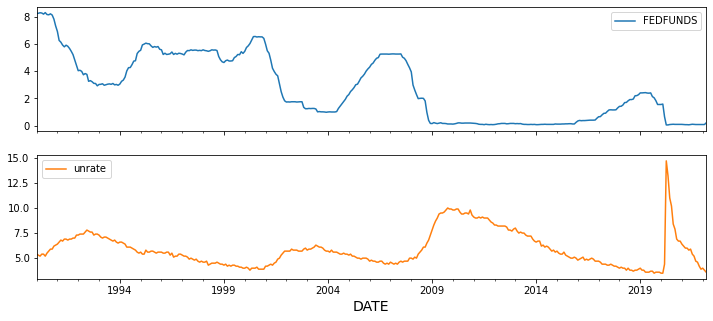

In [99]:
economic_df.plot(subplots=True); plt.show()

In [37]:
def check_stationarity(df):
    kps = kpss(df)
    adf = adfuller(df)
    
    kpss_pv, adf_pv = kps[1], adf[1]
    kpssh, adfh = 'Stationary', 'Non-stationary'
    
    if adf_pv < 0.05:
        # Reject ADF Null Hypothesis
        adfh = 'Stationary'
    if kpss_pv < 0.05:
        # Reject KPSS Null Hypothesis
        kpssh = 'Non-stationary'
    return (kpssh, adfh)

In [38]:
for i in economic_df:
    kps, adf = check_stationarity(economic_df[i])
    print(f'{i} adf: {adf}, kpss: {kps}')

FEDFUNDS adf: Stationary, kpss: Non-stationary
unrate adf: Stationary, kpss: Stationary


The data for testing whether the time series in the second column Granger
causes the time series in the first column. Missing values are not
supported.

In [39]:
granger = grangercausalitytests(economic_df[['unrate', 'FEDFUNDS']], maxlag=12)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5714  , p=0.4502  , df_denom=383, df_num=1
ssr based chi2 test:   chi2=0.5758  , p=0.4479  , df=1
likelihood ratio test: chi2=0.5754  , p=0.4481  , df=1
parameter F test:         F=0.5714  , p=0.4502  , df_denom=383, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=21.5600 , p=0.0000  , df_denom=380, df_num=2
ssr based chi2 test:   chi2=43.6874 , p=0.0000  , df=2
likelihood ratio test: chi2=41.3816 , p=0.0000  , df=2
parameter F test:         F=21.5600 , p=0.0000  , df_denom=380, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=21.4812 , p=0.0000  , df_denom=377, df_num=3
ssr based chi2 test:   chi2=65.6400 , p=0.0000  , df=3
likelihood ratio test: chi2=60.5970 , p=0.0000  , df=3
parameter F test:         F=21.4812 , p=0.0000  , df_denom=377, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=16.0573 , p=0.0000  

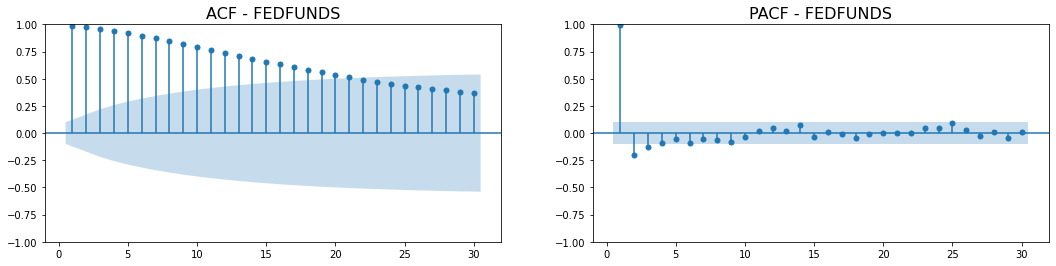

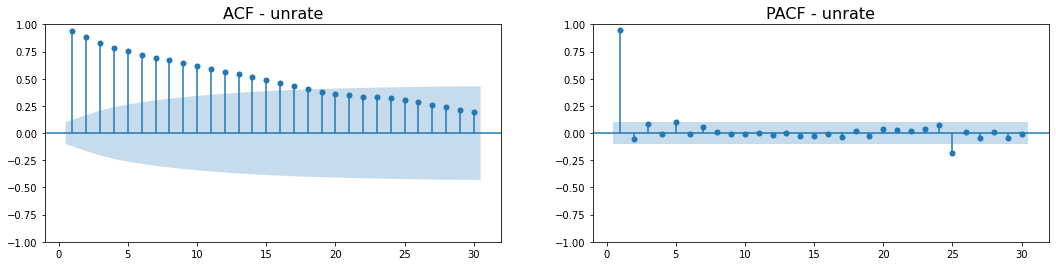

In [40]:
for col in economic_df.columns:
    fig, ax = plt.subplots(1,2, figsize=(18,4))
    plot_acf(economic_df[col], zero=False, 
             lags=30, ax=ax[0], title=f'ACF - {col}')
    plot_pacf(economic_df[col], zero=False, 
              lags=30, ax=ax[1], title=f'PACF - {col}');plt.show()

In [41]:
train = economic_df.loc[:'2019']
test = economic_df.loc['2020':]

In [42]:
train.index

DatetimeIndex(['1990-01-01', '1990-02-01', '1990-03-01', '1990-04-01',
               '1990-05-01', '1990-06-01', '1990-07-01', '1990-08-01',
               '1990-09-01', '1990-10-01',
               ...
               '2019-03-01', '2019-04-01', '2019-05-01', '2019-06-01',
               '2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01',
               '2019-11-01', '2019-12-01'],
              dtype='datetime64[ns]', name='DATE', length=360, freq='MS')

In [43]:
test.index

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01'],
              dtype='datetime64[ns]', name='DATE', freq='MS')

In [100]:
print(f'Train: {len(train)}, Test: {len(test)}')

Train: 360, Test: 27


In [49]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(train)
train_sc = pd.DataFrame(scale.transform(train),
                        index=train.index,
                        columns=train.columns)
test_sc = pd.DataFrame(scale.transform(test), 
                       index=test.index,
                       columns=test.columns)

In [50]:
test[0:5]

,FEDFUNDS,unrate
DATE,,
2020-01-01,1.55,3.5
2020-02-01,1.58,3.5
2020-03-01,0.65,4.4
2020-04-01,0.05,14.7
2020-05-01,0.05,13.2


In [51]:
scale.inverse_transform(test_sc)[0:5]

array([[ 1.55,  3.5 ],
       [ 1.58,  3.5 ],
       [ 0.65,  4.4 ],
       [ 0.05, 14.7 ],
       [ 0.05, 13.2 ]])

<AxesSubplot:xlabel='DATE'>

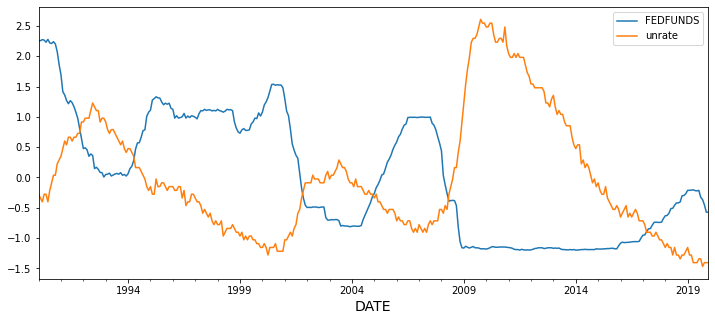

In [52]:
train_sc.plot()

In [53]:
train_sc.shape

(360, 2)

In [54]:
test_sc.shape

(27, 2)

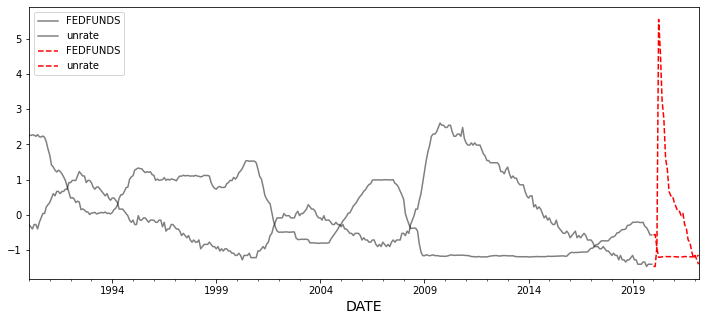

In [56]:
ax = train_sc.plot(style='k', alpha=0.5, label='train')
test_sc.plot(ax=ax, style='r--', label='test')
plt.legend(); plt.show()

In [101]:
model = VAR(endog=train_sc)
res = model.select_order(maxlags=10)
res.summary()

,AIC,BIC,FPE,HQIC
0,-0.3448,-0.3227,0.7084,-0.3360
1,-9.987,-9.921,4.598e-05,-9.961
2,-10.51,-10.40,2.735e-05,-10.46
3,-10.55,-10.40,2.607e-05,-10.49
4,-10.60,-10.40*,2.486e-05,-10.52*
5,-10.60,-10.36,2.496e-05,-10.50
6,-10.62,-10.33,2.446e-05,-10.50
7,-10.65*,-10.32,2.375e-05*,-10.52
8,-10.63,-10.26,2.417e-05,-10.48
9,-10.62,-10.20,2.444e-05,-10.45


In [130]:
res.selected_orders

{'aic': 7, 'bic': 4, 'hqic': 4, 'fpe': 7}

In [102]:
print(f'AIC: {res.aic} , BIC: {res.bic}, \
      HQ: {res.hqic}, FPE: {res.fpe}')

AIC: 7 , BIC: 4,       HQ: 4, FPE: 7


In [59]:
results = model.fit(maxlags=7, ic='aic')

In [60]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 26, Apr, 2022
Time:                     21:49:02
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -10.3164
Nobs:                     353.000    HQIC:                  -10.5142
Log likelihood:           907.070    FPE:                2.38224e-05
AIC:                     -10.6450    Det(Omega_mle):     2.19199e-05
--------------------------------------------------------------------
Results for equation FEDFUNDS
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const              -0.002760         0.002959           -0.933           0.351
L1.FEDFUNDS         1.438184         0.053640           26.812           0.000
L1.unrate          -0.070956         0.033689           -2.106   

In [61]:
type(results)

statsmodels.tsa.vector_ar.var_model.VARResultsWrapper

In [62]:
lag_order = results.k_ar
lag_order

7

In [63]:
results.params

,FEDFUNDS,unrate
const,-0.002760,-0.004556
L1.FEDFUNDS,1.438184,-0.224687
L1.unrate,-0.070956,0.934700
L2.FEDFUNDS,-0.312817,0.331377
L2.unrate,0.057165,0.134072
L3.FEDFUNDS,-0.000598,-0.270760
L3.unrate,-0.025137,0.023986
L4.FEDFUNDS,-0.281447,0.215943
L4.unrate,0.045263,-0.031593
L5.FEDFUNDS,0.159997,-0.155973


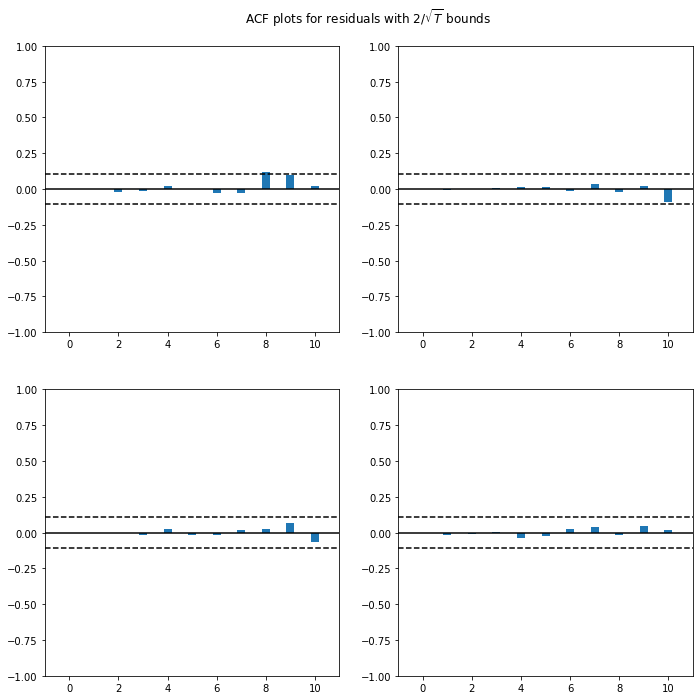

In [64]:
results.plot_acorr(resid=True);plt.show()

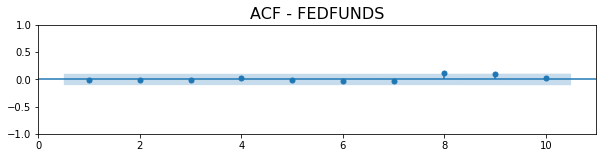

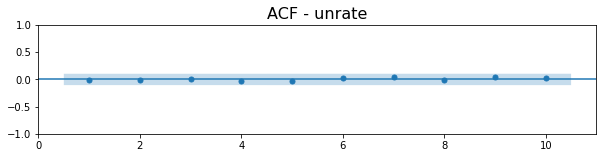

In [70]:
# You can plot your ACF on the resiuals as well using results.resid
for col in results.resid.columns:
    fig, ax = plt.subplots(1,1, figsize=(10,2))
    plot_acf(results.resid[col], zero=False, 
             lags=10, ax=ax, title=f'ACF - {col}')

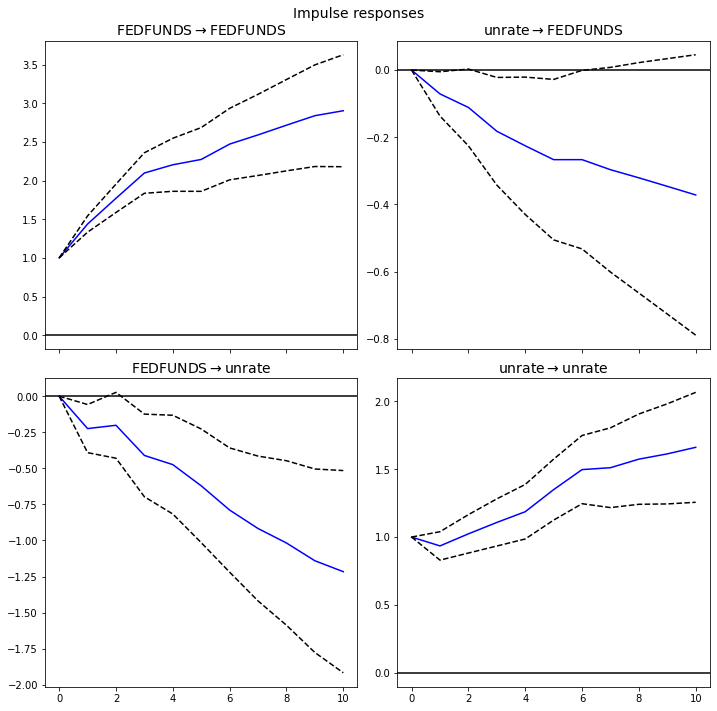

In [71]:
irf = results.irf()
fig = irf.plot(subplot_params= {'fontsize' : 14})
fig.tight_layout();plt.show()

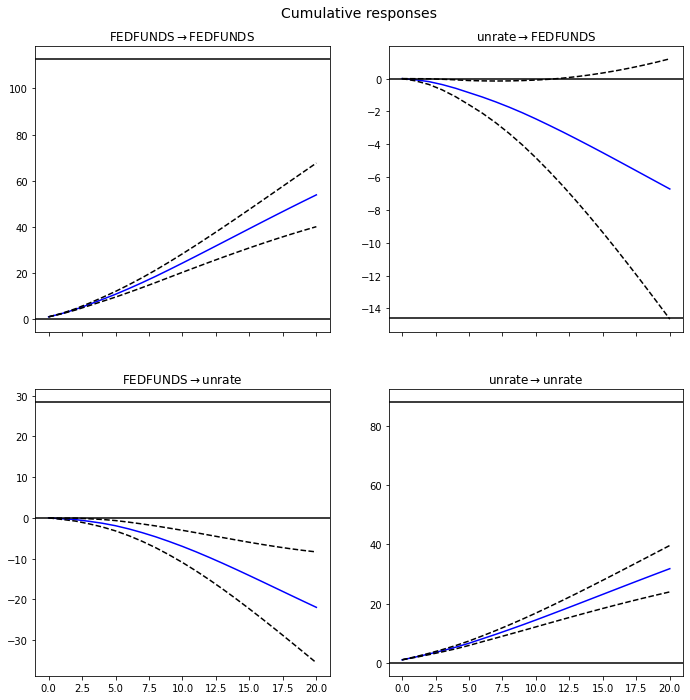

In [164]:
irf.plot_cum_effects();plt.show()

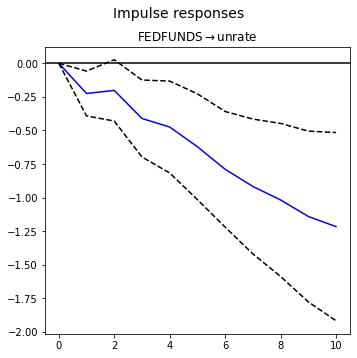

In [72]:
fig = irf.plot(impulse='FEDFUNDS', response='unrate', figsize=(5, 5))
fig.tight_layout(); plt.show()

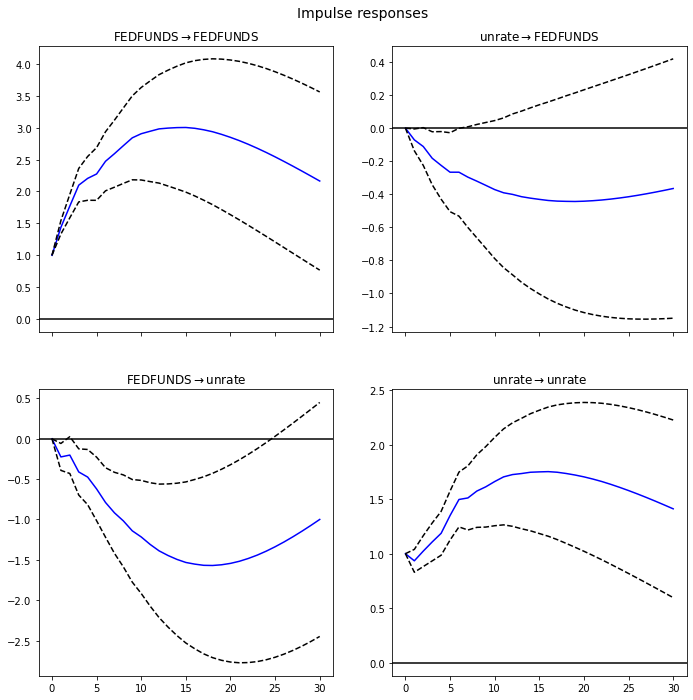

In [73]:
# Example changing lag value
irf = results.irf(30)
irf.plot();

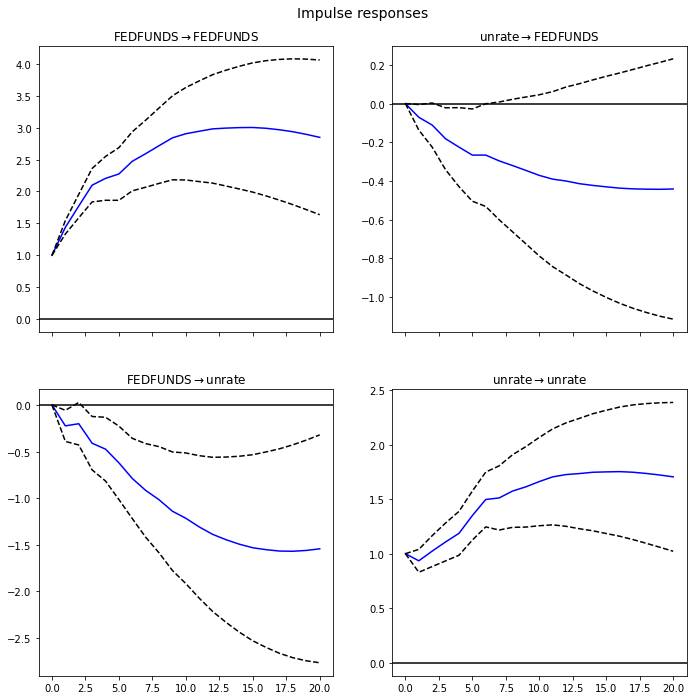

In [74]:
# Example changing lag value
irf = results.irf(20)
irf.plot();plt.show()

In [171]:
fv = results.fevd()
fv.summary()

FEVD for FEDFUNDS
     FEDFUNDS    unrate
0    1.000000  0.000000
1    0.995882  0.004118
2    0.992982  0.007018
3    0.988129  0.011871
4    0.983751  0.016249
5    0.979365  0.020635
6    0.977557  0.022443
7    0.975628  0.024372
8    0.973881  0.026119
9    0.972219  0.027781

FEVD for unrate
     FEDFUNDS    unrate
0    0.000052  0.999948
1    0.009640  0.990360
2    0.011030  0.988970
3    0.022521  0.977479
4    0.031372  0.968628
5    0.042295  0.957705
6    0.055264  0.944736
7    0.069168  0.930832
8    0.081814  0.918186
9    0.094954  0.905046




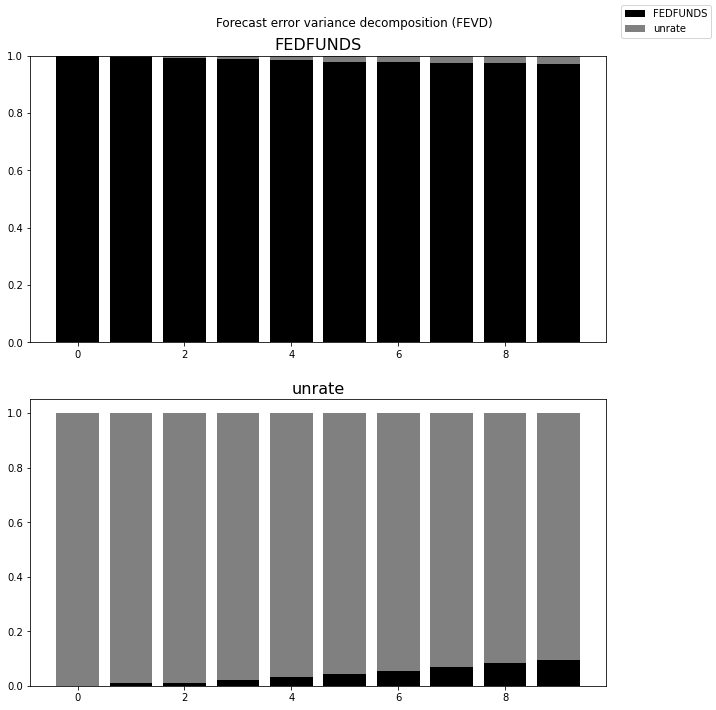

In [173]:
fv.plot(); plt.show()

In [76]:
train_sc[-lag_order:]

,FEDFUNDS,unrate
DATE,,
2019-06-01,-0.221874,-1.406305
2019-07-01,-0.213414,-1.343570
2019-08-01,-0.327635,-1.343570
2019-09-01,-0.365709,-1.469039
2019-10-01,-0.454548,-1.406305
2019-11-01,-0.573000,-1.406305
2019-12-01,-0.573000,-1.406305


In [103]:
past_y

array([[-0.22187449, -1.40630456],
       [-0.21341362, -1.34356978],
       [-0.32763532, -1.34356978],
       [-0.36570923, -1.46903933],
       [-0.45454833, -1.40630456],
       [-0.57300047, -1.40630456],
       [-0.57300047, -1.40630456]])

<AxesSubplot:xlabel='DATE'>

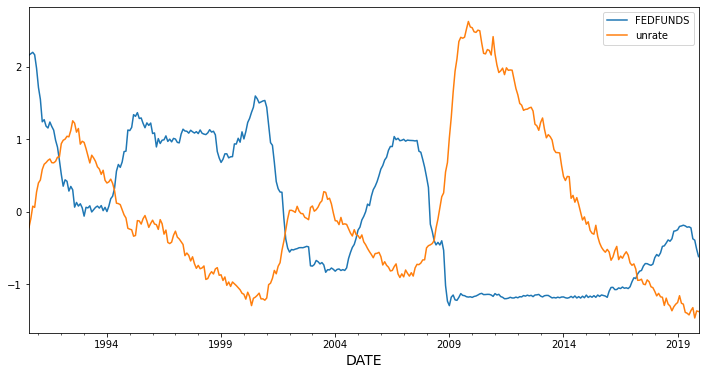

In [127]:
results.fittedvalues.plot(figsize=(12,6))

array([<AxesSubplot:xlabel='DATE'>, <AxesSubplot:xlabel='DATE'>],
      dtype=object)

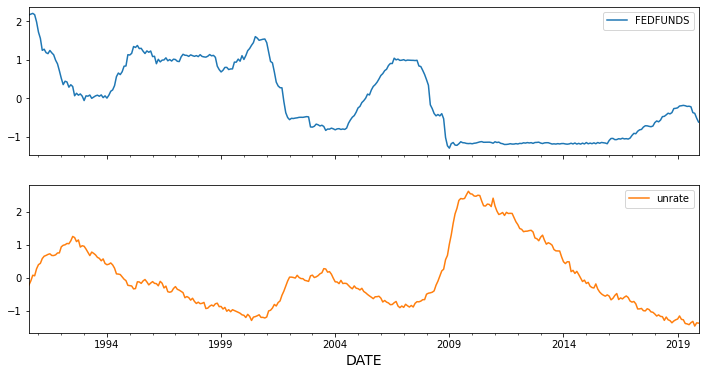

In [79]:
results.fittedvalues.plot(figsize=(12,6), subplots=True)

In [80]:
forecast[0:10]

array([[-0.59168247, -1.37838262],
       [-0.61677229, -1.35907247],
       [-0.62285446, -1.34758377],
       [-0.64131309, -1.30874693],
       [-0.66777298, -1.2866905 ],
       [-0.67714593, -1.26409756],
       [-0.68695825, -1.23874335],
       [-0.69427855, -1.21523363],
       [-0.6949009 , -1.192685  ],
       [-0.69551402, -1.16814049]])

In [175]:
results

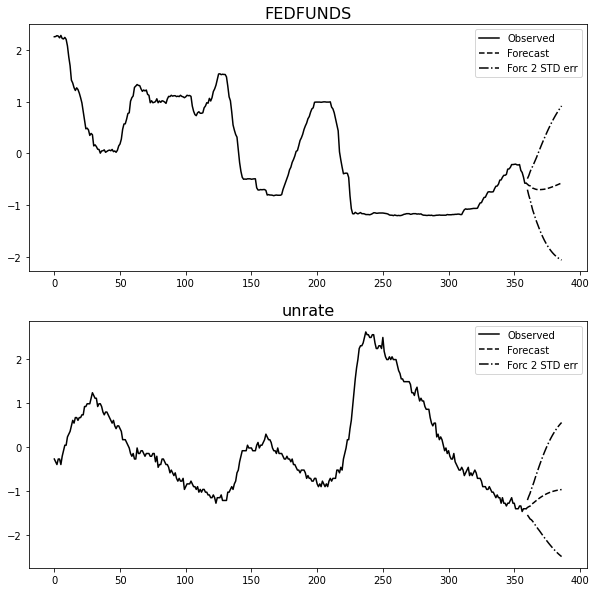

In [174]:
results.plot_forecast(n, plot_stderr=True);

**Manually creating a similar plot**

In [82]:
past_y.shape

(7, 2)

In [131]:
past_y = train_sc[-lag_order:].values
n = test_sc.shape[0]
forecast = results.forecast_interval(past_y, n)

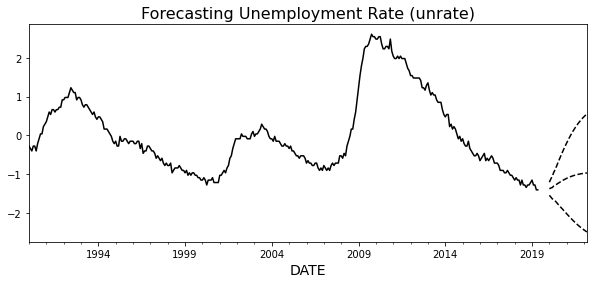

In [83]:
forecast, lower, upper = results.forecast_interval(past_y, steps=n)

idx = test.index
style = 'k--'
ax = train_sc.iloc[:-lag_order, 1].plot(figsize=(10, 4), style='k')
pred_forecast  = pd.Series(forecast[:, 1], index=idx).plot(ax=ax, style=style)
pred_lower = pd.Series(lower[:, 1], index=idx).plot(ax=ax, style=style)
pred_upper  = pd.Series(upper[:, 1], index=idx).plot(ax=ax, style=style)
plt.title('Forecasting Unemployment Rate (unrate)')
plt.show()

Alternatively you can also use `fill_between`

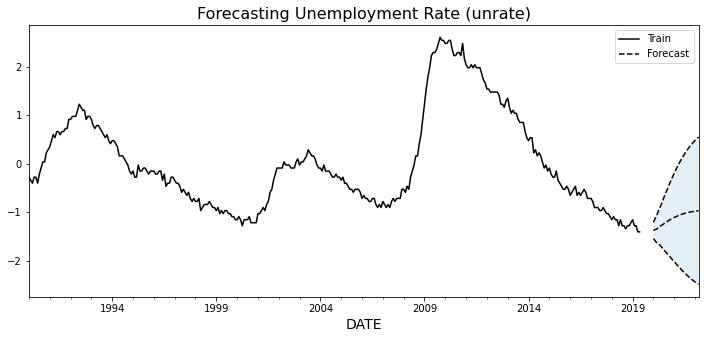

In [140]:
forecast, lower, upper = results.forecast_interval(past_y, steps=n)

idx = test.index; style = 'k--'
ax = train_sc.iloc[:-lag_order, 1].plot(style='k')
pred_forecast  = pd.Series(forecast[:, 1], index=idx).plot(ax=ax, style=style)
pred_lower = pd.Series(lower[:, 1], index=idx).plot(ax=ax, style=style)
pred_upper  = pd.Series(upper[:, 1], index=idx).plot(ax=ax, style=style)
plt.fill_between(idx, lower[:,1], upper[:,1], alpha=0.12)
plt.title('Forecasting Unemployment Rate (unrate)')
plt.legend(['Train','Forecast']);plt.show()

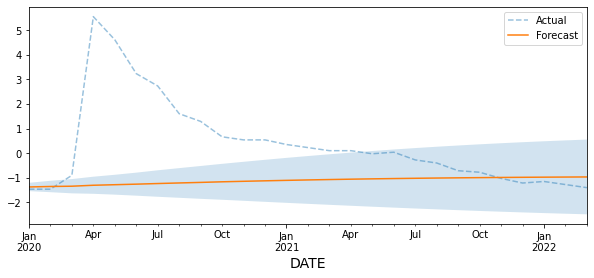

In [85]:
test_sc['unrate'].plot(style='--', alpha=0.45, figsize=(10, 4)).plot()
pd.Series(forecast[ :, 1], index=test_sc.index).plot()
plt.fill_between(idx, lower[:,1], upper[:,1], alpha=0.2)
plt.legend(['Actual', 'Forecast'])

## There is more
* Comparing the results from VAR(7) with an AR(7) 
* AR(7) is a univariate this way we are comparing using one variable (unrate) to see if using two variables are better or not
* Using ARIMA(7, 0, 0) indicates an AR(7)

In [86]:
from statsmodels.tsa.arima.model import ARIMA

In [153]:
model = ARIMA(train_sc['unrate'], 
              order=(lag_order,0,0)).fit()

In [154]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 unrate   No. Observations:                  360
Model:                 ARIMA(7, 0, 0)   Log Likelihood                 364.998
Date:                Tue, 26 Apr 2022   AIC                           -711.996
Time:                        23:26:54   BIC                           -677.021
Sample:                    01-01-1990   HQIC                          -698.089
                         - 12-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1014      0.449     -0.226      0.821      -0.982       0.779
ar.L1          0.9491      0.047     20.394      0.000       0.858       1.040
ar.L2          0.1705      0.068      2.489      0.013       0.036       0.305
ar.L3          0.0178      0.076      0.233      0.816      -0.132       0.167
ar.L4         -0.0303      0.075     -0.405      0.685      -0.177       0.116
ar.L5          0.0639      0.071      0.894      0.372      -0.076       0.204
ar.L6         -0.0134      0.075     -0.178      0.859      -0.161       0.134
ar.L7         -0.1687      0.052     -3.275      0.001      -0.270      -0.068
sigma2         0.0076      0.001     14.487      0.000       0.007       0.009
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 6.41
Prob(Q):                              0.87   Prob(JB):                         0.04
Heteroskedasticity (H):               1.15   Skew:                             0.19
Prob(H) (two-sided):                  0.46   Kurtosis:                         3.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

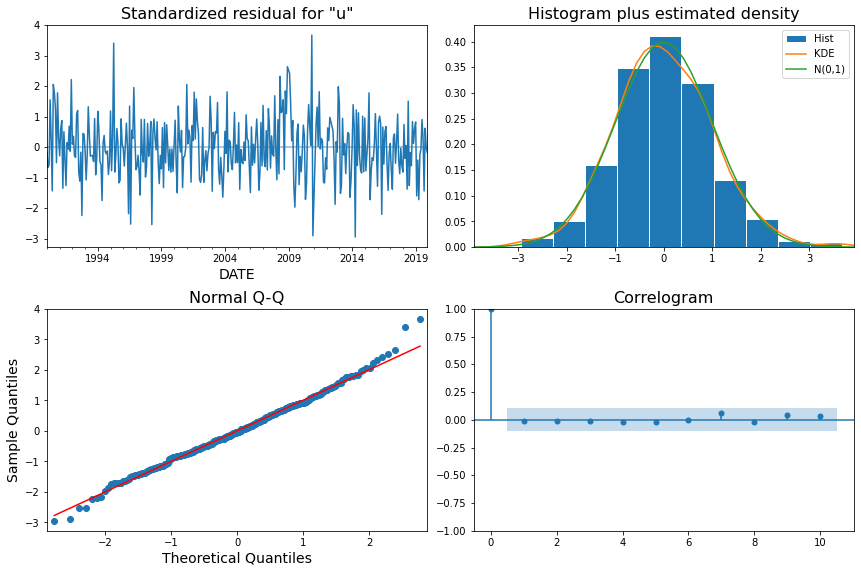

In [156]:
fig = model.plot_diagnostics(figsize=(12,8));
fig.tight_layout();plt.show()

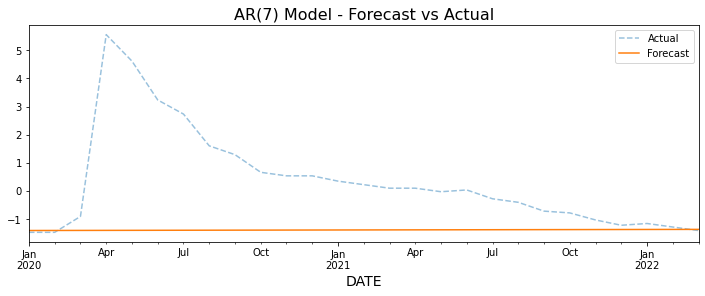

In [95]:
# Plotting the results from an AR(7)
plt.title('AR(7) Model - Forecast vs Actual')
test_sc['unrate'].plot(style='--', alpha=0.45, figsize=(12, 4))
pd.Series(model.forecast(n), index=test_sc.index).plot()
plt.legend(['Actual', 'Forecast'])

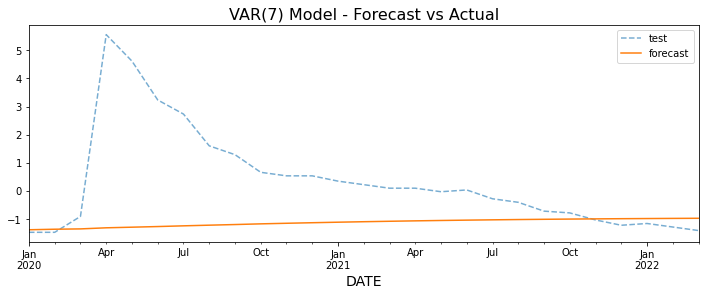

In [96]:
index = test_sc.index
plt.title('VAR(7) Model - Forecast vs Actual')
ax = test_sc['unrate'].plot(style='--', alpha=0.6, figsize=(12,4))
pd.Series(forecast[:, 1], index=index).plot(style='-', ax=ax)
plt.legend(['test', 'forecast']); plt.show()

In [97]:
from statsmodels.tools.eval_measures import mse
np.sqrt(mse(test['unrate'], forecast[:, 1]))

8.070406992273286

In [98]:
np.sqrt(mse(test['unrate'], model.forecast(n)))

8.055331303489288

In [123]:
scale = StandardScaler()
train_stage2_sc = pd.DataFrame(scale.fit_transform(train_stage2),
                            index=train_stage2.index,
                              columns=train_stage2.columns)
test_stage2_sc = pd.DataFrame(scale.transform(test_stage2), 
                           index=test_stage2.index,
                             columns=test_stage2.columns)

In [124]:
train_stage2_sc.shape

(372, 2)

In [125]:
test_stage2_sc.shape

(12, 2)

In [128]:
model = VAR(endog=train_stage2_sc, freq='MS')
results = model.fit(maxlags=30, ic='aic')

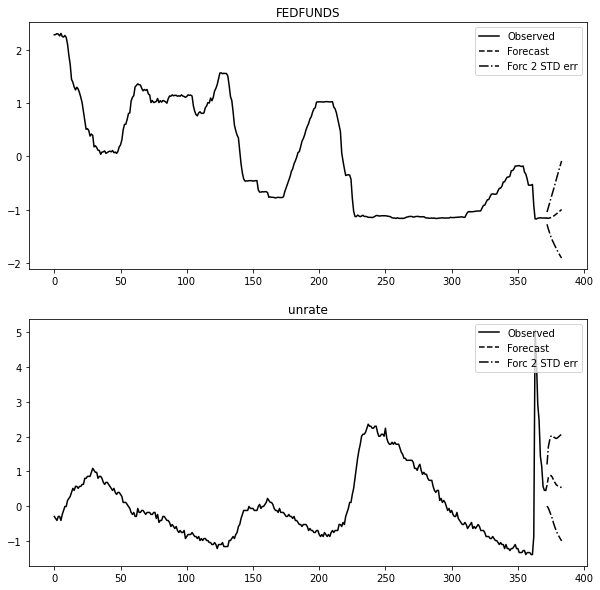

In [134]:
n = test_stage2_sc.shape[0]
results.plot_forecast(n); plt.show()

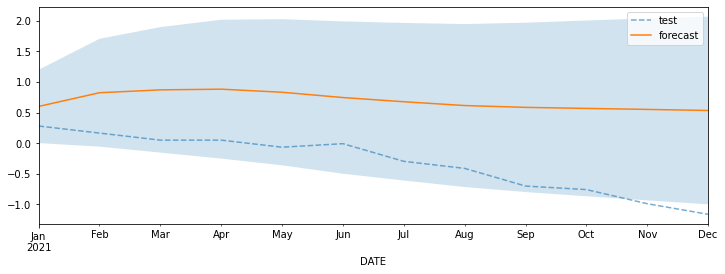

In [135]:
forecast, lower_ci, upper_ci = results.forecast_interval(past_y, n)

index = test_stage2_sc.index
ax = test_stage2_sc['unrate'].plot(style='--', alpha=0.6, figsize=(12,4))
pd.Series(forecast[:, 1], index=index).plot(style='-', ax=ax)
plt.fill_between(index, lower_ci[:,1], upper_ci[:,1], alpha=0.2)
plt.legend(['test', 'forecast']); plt.show()

# Forecasting Volatility in Financial Time Series Data with GARCH


In [116]:
import arch
arch.__version__

'5.1.0'

In [117]:
from arch import arch_model

In [118]:
msft = pd.read_csv('../../datasets/Ch11/msft.csv', 
                   index_col='Date', 
                   parse_dates=True)
msft.head()

,close
Date,
2010-01-04,23.904985
2010-01-05,23.912710
2010-01-06,23.765955
2010-01-07,23.518789
2010-01-08,23.680998


In [119]:
msft['returns'] = 100 * msft.pct_change()
msft.dropna(inplace=True, how='any')
msft.head()

,close,returns
Date,,
2010-01-05,23.912710,0.032314
2010-01-06,23.765955,-0.613712
2010-01-07,23.518789,-1.039999
2010-01-08,23.680998,0.689698
2010-01-11,23.379765,-1.272046


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

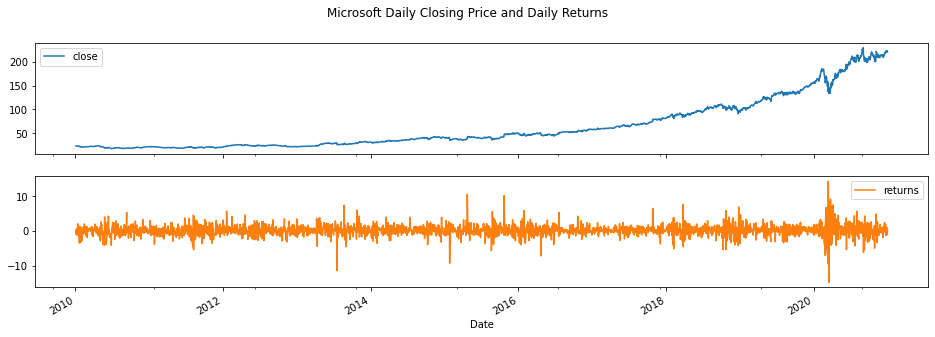

In [129]:
msft.plot(subplots=True, 
          title='Microsoft Daily Closing Price and Daily Returns')

In [132]:
# # fig, ax = plt.subplots(1,2, figsize=(20,3))
# plot_acf(msft['returns'], zero=False);plt.show()
# plot_pacf(msft['returns'], zero=False); plt.show()

In [122]:
# volatility = msft_return.std()
# volatility

In [123]:
# annualized = np.sqrt(252)*volatility
# annualized

In [105]:
# msft_return.rolling(22).apply(lambda x: x.std()*np.sqrt(252)).plot()

In [124]:
idx = round(len(msft) * 0.90)
train = msft.returns[:idx]
test = msft.returns[idx:]
print(f'Train: {train.shape}')
print(f'Test: {test.shape}')

Train: (2491,)
Test: (277,)


In [133]:
model = arch_model(train, 
                   p=1, q=1,
                   mean='Constant',
                   vol='GARCH',
                   dist='normal')

In [138]:
results = model.fit(update_freq=5)

Iteration:      5,   Func. Count:     36,   Neg. LLF: 4374.845453710037
Iteration:     10,   Func. Count:     62,   Neg. LLF: 4361.891627557763
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4361.891627557763
            Iterations: 11
            Function evaluations: 66
            Gradient evaluations: 11


In [139]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4361.89
Distribution:                  Normal   AIC:                           8731.78
Method:            Maximum Likelihood   BIC:                           8755.07
                                        No. Observations:                 2491
Date:                Mon, Mar 28 2022   Df Residuals:                     2490
Time:                        03:49:12   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1156  2.702e-02      4.279  1.877e-05 [6.266e-02,  0.169]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.3594      0.127      2.836  4.574e-03   [  0.111,  0.608]
alpha[1]       0.1458  4.424e-02      3.294  9.861e-04 [5.904e-02,  0.232]
beta[1]        0.6912  8.177e-02      8.454  2.821e-17   [  0.531,  0.852]
==========================================================================

Covariance estimator: robust
"""

$\omega$, $\alpha$ and $\beta$ are estimated by Maximum Likelihood Method

In [140]:
results.params

mu          0.115615
omega       0.359401
alpha[1]    0.145750
beta[1]     0.691248
Name: params, dtype: float64

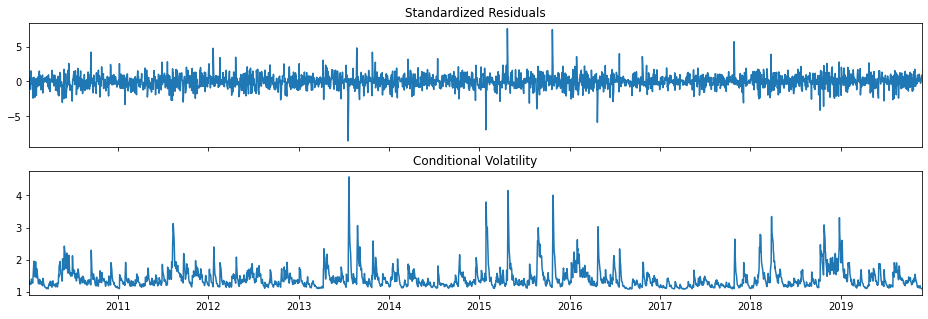

In [143]:
results.plot(); plt.show()

In [72]:
results.std_err

mu          0.028837
omega       0.149074
alpha[1]    0.048233
beta[1]     0.093537
Name: std_err, dtype: float64

Text(0.5, 1.0, 'Standardized Residuals')

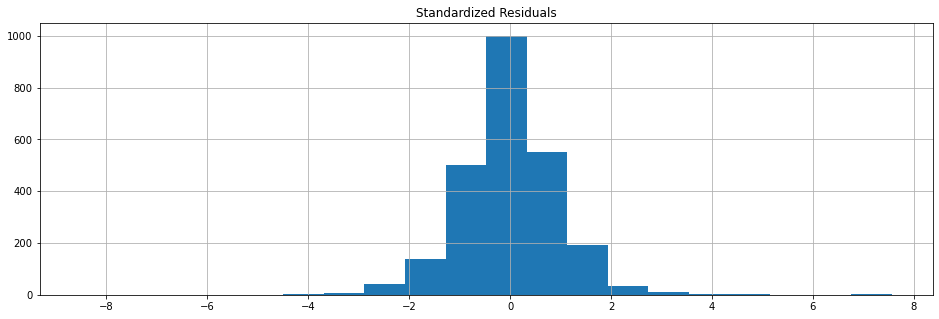

In [151]:
results.std_resid.hist(bins=20)
plt.title('Standardized Residuals')

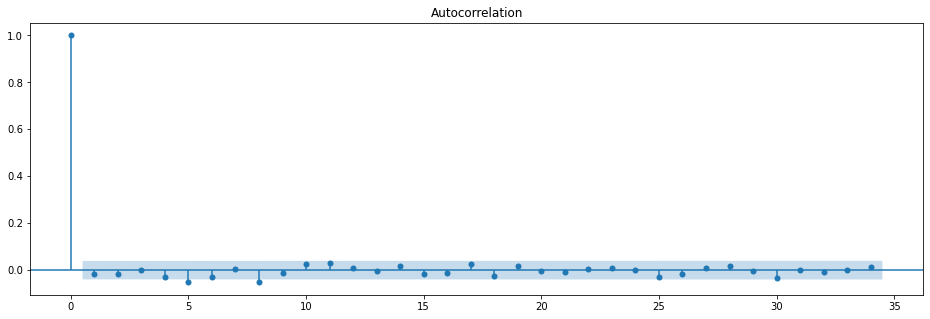

In [170]:
plot_acf(results.std_resid);plt.show()

In [186]:
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(results.std_resid, 
               lags=10, 
               return_df=True)['lb_pvalue']

1     0.396521
2     0.530357
3     0.735656
4     0.473760
5     0.087968
6     0.070935
7     0.109796
8     0.017272
9     0.025041
10    0.021833
Name: lb_pvalue, dtype: float64

In [154]:
msft_forecast = results.forecast(horizon=test.shape[0])

In [188]:
msft_forecast.variance[-1:]

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.268,h.269,h.270,h.271,h.272,h.273,h.274,h.275,h.276,h.277
Date,,,,,,,,,,,,,,,,,,,,,
2019-11-25,1.341888,1.482559,1.600301,1.69885,1.781336,1.850377,1.908163,1.956531,1.997014,2.030899,...,2.204893,2.204893,2.204893,2.204893,2.204893,2.204893,2.204893,2.204893,2.204893,2.204893


In [155]:
msft_forecast.mean[-1:]

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.268,h.269,h.270,h.271,h.272,h.273,h.274,h.275,h.276,h.277
Date,,,,,,,,,,,,,,,,,,,,,
2019-11-25,0.115615,0.115615,0.115615,0.115615,0.115615,0.115615,0.115615,0.115615,0.115615,0.115615,...,0.115615,0.115615,0.115615,0.115615,0.115615,0.115615,0.115615,0.115615,0.115615,0.115615


<AxesSubplot:xlabel='Date'>

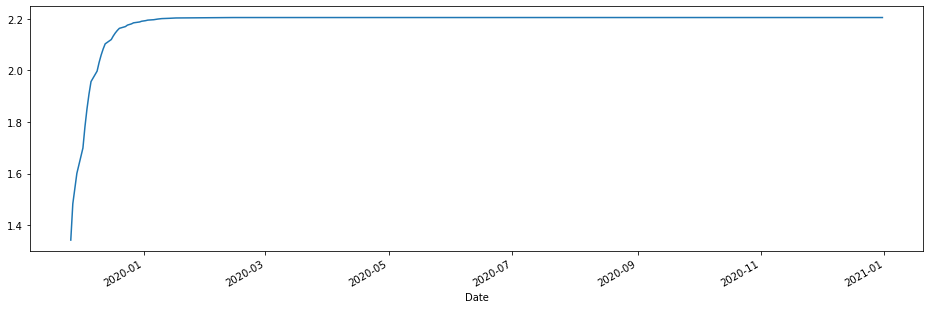

In [189]:
forecast = msft_forecast.variance[-1:]
pd.Series(forecast.values.ravel(), index=test.index).plot()

## There is more

In [203]:
model = arch_model(train, 
                   p=1, q=1,
                   mean='Zero',
                   vol='GARCH',
                   dist='normal')
results = model.fit(disp=False)

In [204]:
results.params

omega       0.345501
alpha[1]    0.130555
beta[1]     0.711339
Name: params, dtype: float64

In [205]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4371.30
Distribution:                  Normal   AIC:                           8748.59
Method:            Maximum Likelihood   BIC:                           8766.06
                                        No. Observations:                 2491
Date:                Mon, Mar 28 2022   Df Residuals:                     2491
Time:                        04:37:36   Df Model:                            0
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.3455      0.127      2.717  6.594e-03 [9.624e-02,  0.595]
alpha[1]       0.1306  3.998e-02      3.266  1.091e-03 [5.220e-02,  0.209]
beta[1]        0.7113  8.038e-02      8.850  8.787e-19   [  0.554,  0.869]
==========================================================================

Covariance estimator: robust
"""

In [206]:
msft_forecast = results.forecast(horizon=test.shape[0])
msft_forecast.mean[-1:]

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.268,h.269,h.270,h.271,h.272,h.273,h.274,h.275,h.276,h.277
Date,,,,,,,,,,,,,,,,,,,,,
2019-11-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [223]:
model = arch_model(train, 
                   p=1, q=1,
                   mean='LS', lags=1,
                   vol='GARCH',
                   dist='normal')
results = model.fit(disp=False)
results.params

Const       0.115615
omega       0.359401
alpha[1]    0.145750
beta[1]     0.691248
Name: params, dtype: float64

In [220]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           AR - GARCH Model Results                           
==============================================================================
Dep. Variable:                returns   R-squared:                       0.001
Mean Model:                        AR   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4360.29
Distribution:                  Normal   AIC:                           8730.58
Method:            Maximum Likelihood   BIC:                           8759.68
                                        No. Observations:                 2490
Date:                Mon, Mar 28 2022   Df Residuals:                     2488
Time:                        04:46:13   Df Model:                            2
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
Const          0.1174  2.742e-02      4.282  1.853e-05    [6.367e-02,  0.171]
returns[1]    -0.0231  2.689e-02     -0.859      0.390 [-7.580e-02,2.961e-02]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.3575      0.129      2.763  5.730e-03   [  0.104,  0.611]
alpha[1]       0.1438  4.441e-02      3.239  1.200e-03 [5.680e-02,  0.231]
beta[1]        0.6937  8.344e-02      8.313  9.297e-17   [  0.530,  0.857]
==========================================================================

Covariance estimator: robust
"""

In [221]:
results.model

AR(constant: yes, lags: 1, no. of exog: 0, volatility: GARCH(p: 1, q: 1), distribution: Normal distribution), id: 0x7fe3eefb2a00